In [11]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
#显示所有列
pd.set_option('display.max_columns', None)
#显示所有行
pd.set_option('display.max_rows', None)
#设置value的显示长度为100，默认为50
pd.set_option('max_colwidth',100)

In [12]:
def reduce_mem_usage(df):

    start_mem = df.memory_usage().sum() 
    print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))
    
    for col in df.columns:
        col_type = df[col].dtype
        
        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
        else:
            df[col] = df[col].astype('category')

    end_mem = df.memory_usage().sum() 
    print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))
    return df

In [13]:
data = pd.read_csv('data1.csv', sep=',')
data = reduce_mem_usage(data)

Memory usage of dataframe is 553928.00 MB
Memory usage after optimization is: 147028.00 MB
Decreased by 73.5%


In [14]:
data = pd.read_csv('data1.csv', sep=',')
data = reduce_mem_usage(data)

best combination (r2: 0.129): (18, 19, 24, 38, 39, 50, 51, 55, 59, 69, 75, 79, 85, 115, 116, 126, 142, 165, 167, 169, 186, 190, 192, 194, 195)

all subsets:
 {1: {'feature_idx': (192,), 'cv_scores': array([-0.00083706, -0.00626102,  0.11757587, -0.11141745, -0.01840343]), 'avg_score': -0.0038686183851037504, 'feature_names': ('192',)}, 2: {'feature_idx': (38, 192), 'cv_scores': array([ 0.02869416, -0.02302184,  0.15936645, -0.00702027,  0.03153229]), 'avg_score': 0.037910159006743036, 'feature_names': ('38', '192')}, 3: {'feature_idx': (19, 38, 192), 'cv_scores': array([0.00320662, 0.02248368, 0.15044775, 0.0875776 , 0.04152416]), 'avg_score': 0.061047960696911006, 'feature_names': ('19', '38', '192')}, 4: {'feature_idx': (19, 38, 192, 194), 'cv_scores': array([0.05988684, 0.05158059, 0.15980074, 0.05323743, 0.06349973]), 'avg_score': 0.07760106518046077, 'feature_names': ('19', '38', '192', '194')}, 5: {'feature_idx': (19, 38, 51, 192, 194), 'cv_scores': array([0.07045373, 0.05922094,

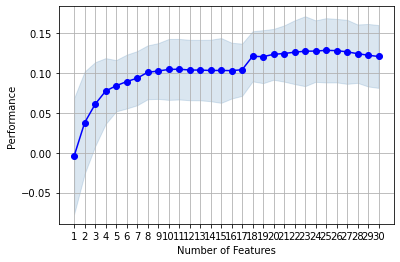

In [18]:
# 前向岭回归
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.neighbors import KNeighborsClassifier
from mlxtend.data import wine_data
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.kernel_ridge import KernelRidge
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
sfs1 = SFS(estimator=Ridge(), 
           k_features=(15, 30),
           forward=True, 
           floating=False, 
           scoring='r2',
           cv=5)

pipe = make_pipeline(StandardScaler(), sfs1)

pipe.fit(X, Y)

print('best combination (r2: %.3f): %s\n' % (sfs1.k_score_, sfs1.k_feature_idx_))
print('all subsets:\n', sfs1.subsets_)
plot_sfs(sfs1.get_metric_dict(), kind='std_dev')
plt.grid()
plt.show()

In [19]:
# 前向xgb
from xgboost.sklearn import XGBRegressor
sfs2 = SFS(estimator=XGBRegressor(n_estimators = 100, objective='reg:squarederror'), 
           k_features=(15, 30),
           forward=True, 
           floating=False, 
           scoring='r2',
           cv=5)


sfs2.fit(X, Y)

SequentialFeatureSelector(clone_estimator=True, cv=5,
                          estimator=XGBRegressor(base_score=None, booster=None,
                                                 colsample_bylevel=None,
                                                 colsample_bynode=None,
                                                 colsample_bytree=None,
                                                 gamma=None, gpu_id=None,
                                                 importance_type='gain',
                                                 interaction_constraints=None,
                                                 learning_rate=None,
                                                 max_delta_step=None,
                                                 max_depth=None,
                                                 min_child_weight=None,
                                                 missing=nan,
                                                 monotone_constra...,
               

best combination (r2: -0.107): (19, 40, 44, 47, 51, 53, 71, 85, 95, 97, 107, 116, 122, 124, 136, 145, 153, 154, 155, 160, 168, 175, 207)

all subsets:
 {1: {'feature_idx': (136,), 'cv_scores': array([-0.04493634, -0.0390648 ,  0.03494865, -0.1639877 , -0.00602406]), 'avg_score': -0.04381285296541524, 'feature_names': ('x238',)}, 2: {'feature_idx': (47, 136), 'cv_scores': array([-0.23064085,  0.03096115,  0.0525927 , -0.21797673, -0.17747316]), 'avg_score': -0.10850737764226585, 'feature_names': ('x76', 'x238')}, 3: {'feature_idx': (47, 136, 153), 'cv_scores': array([-0.5704933 , -0.17810013,  0.05249778, -0.21734994, -0.17010119]), 'avg_score': -0.21670935428027144, 'feature_names': ('x76', 'x238', 'x263')}, 4: {'feature_idx': (47, 136, 153, 154), 'cv_scores': array([-0.26887736, -0.24184838,  0.05639567, -0.21833012, -0.17435882]), 'avg_score': -0.1694038000372376, 'feature_names': ('x76', 'x238', 'x263', 'x265')}, 5: {'feature_idx': (47, 95, 136, 153, 154), 'cv_scores': array([-0.466

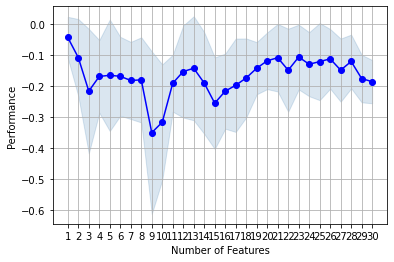

In [20]:
print('best combination (r2: %.3f): %s\n' % (sfs2.k_score_, sfs2.k_feature_idx_))
print('all subsets:\n', sfs2.subsets_)
plot_sfs(sfs2.get_metric_dict(), kind='std_dev')
plt.grid()
plt.show()

In [25]:
from sklearn.feature_selection import SelectKBest, chi2
from minepy import MINE
np.set_printoptions(threshold=np.inf)
def mic(x, y):
    m = MINE()
    m.compute_score(x, y)
    return (m.mic(), 0.5)

SelectKBest(lambda X, Y:np.array(list(map(lambda x: mic(x, Y), X.T))).T[0], k=30).fit_transform(X, Y)

array([[ 3.34687500e+01,  4.99062500e+01,  1.51000977e-01,
         1.33625000e+02,  2.76093750e+01,  1.62719727e-01,
         3.35411906e+05,  4.27846802e+02,  2.36750000e+02,
         1.38000000e+04,  1.22658000e+07,  1.84692383e-01,
         2.00000000e+01,  8.60625000e+01,  1.70043945e-01,
         1.15400001e-01,  1.98593750e+01,  1.21699996e-01,
         2.22031250e+01,  1.00016594e-04,  2.22851562e+00,
         2.22851562e+00,  2.00312500e+01,  4.27500000e+02,
         3.38867188e-01,  6.94531250e+00,  2.66357422e-01,
        -4.00066376e-04,  6.87890625e+00,  3.53271484e-01],
       [ 3.33125000e+01,  4.99687500e+01,  1.49169922e-01,
         1.33875000e+02,  2.76093750e+01,  1.59667969e-01,
         3.35411906e+05,  4.28047302e+02,  2.36750000e+02,
         1.13760000e+04,  1.22658000e+07,  1.84692383e-01,
         2.00000000e+01,  8.60625000e+01,  1.70043945e-01,
         8.34000036e-02,  2.37968750e+01,  8.90000015e-02,
         2.66406250e+01, -2.00033188e-04,  2.22851562e+

In [26]:
from sklearn.ensemble import RandomForestRegressor
regr = RandomForestRegressor(max_depth=10, random_state=0)
regr.fit(X, Y)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=10, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [27]:
feature_list = []
for i in X.columns:
    feature_list.append(i)

In [38]:
rf_importance = sorted(zip(map(lambda x: round(x, 4), regr.feature_importances_), feature_list), reverse=True)

In [59]:
score = []
for i in feature_list:
    cor = X[i].corr(Y, method="spearman")
    score.append(cor)

In [60]:
rf_importance

[(0.0386, 'x77'),
 (0.0282, 'x68'),
 (0.0241, 'x239'),
 (0.0224, 'x30'),
 (0.0222, 'x345'),
 (0.0216, 'x258'),
 (0.021, 'x37'),
 (0.0209, 'x226'),
 (0.0184, 'x128'),
 (0.0181, 'x244'),
 (0.0151, 'x33'),
 (0.014, 'x61'),
 (0.0138, 'x306'),
 (0.0136, 'x26'),
 (0.0127, 'x2'),
 (0.012, 'x46'),
 (0.0112, 'x274'),
 (0.0108, 'x12'),
 (0.0107, 'x74'),
 (0.0105, 'x79'),
 (0.0105, 'x6'),
 (0.0104, 'x28'),
 (0.0102, 'x54'),
 (0.0099, 'x184'),
 (0.0097, 'x60'),
 (0.0097, 'x312'),
 (0.0097, 'x162'),
 (0.0095, 'x320'),
 (0.0094, 'x315'),
 (0.0089, 'x245'),
 (0.0086, 'x273'),
 (0.0084, 'x219'),
 (0.0078, 'x314'),
 (0.0078, 'x307'),
 (0.0078, 'x191'),
 (0.0078, 'x169'),
 (0.0073, 'x52'),
 (0.0073, 'x164'),
 (0.0071, 'x240'),
 (0.0071, 'x130'),
 (0.007, 'x195'),
 (0.0069, 'x182'),
 (0.0064, 'x317'),
 (0.0064, 'x123'),
 (0.0062, 'x51'),
 (0.0062, 'x310'),
 (0.006, 'x194'),
 (0.0059, 'x4'),
 (0.0059, 'x174'),
 (0.0058, 'x16'),
 (0.0055, 'x89'),
 (0.0055, 'x156'),
 (0.0055, 'x132'),
 (0.0054, 'x205'),
 (0

In [61]:
im_score = []
im_name = []
for i in rf_importance:
    im_score.append(i[0])
    im_name.append(i[1])
im_name.append('y')

In [63]:
top50_name = im_name[:50]

In [65]:
top50_name.append('y')

In [66]:
data_50 = data[top50_name]
correlation = data_50.corr()

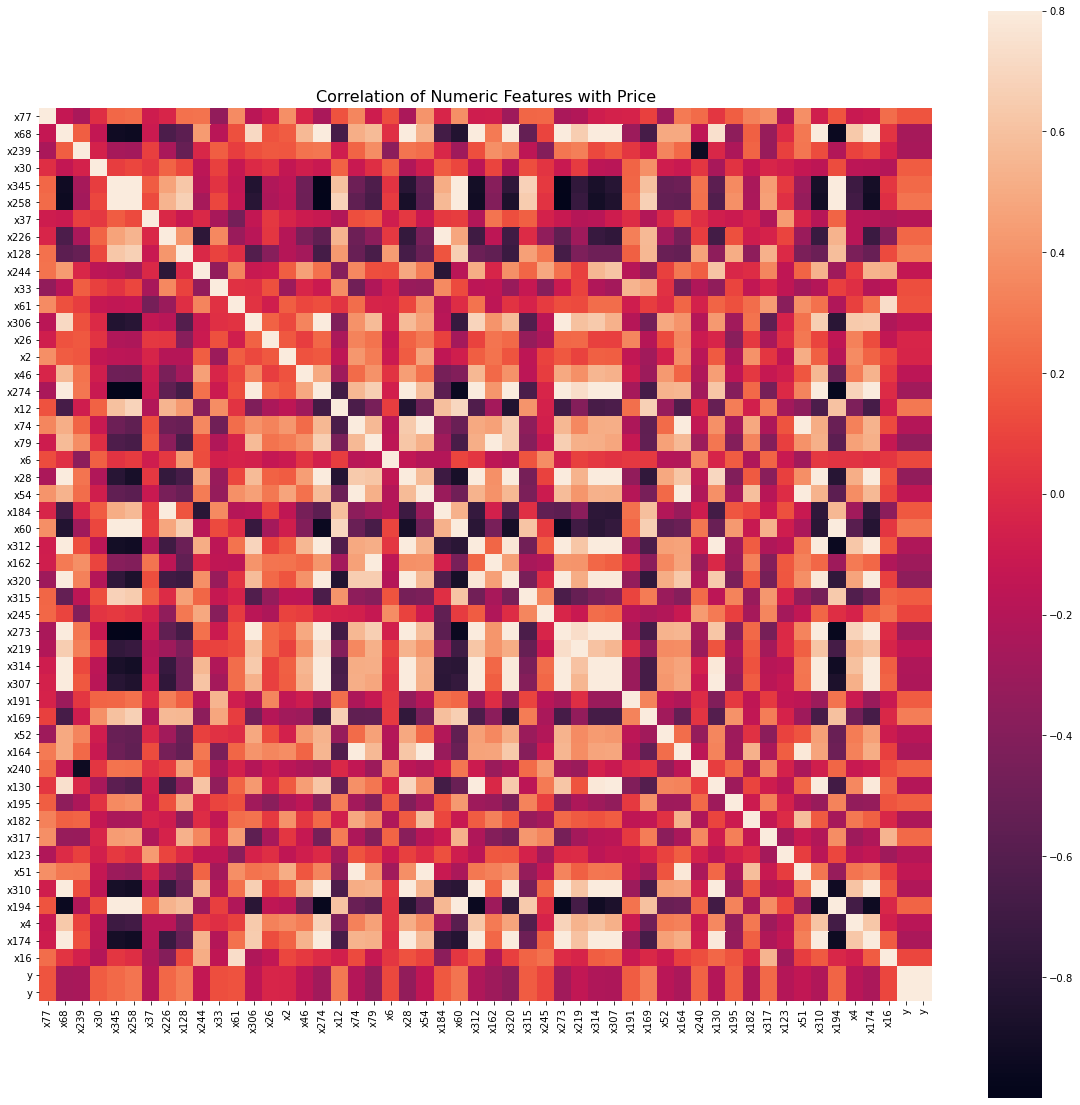

In [68]:
# f , ax = plt.subplots(figsize = (20, 20))
# plt.title('Correlation of Numeric Features with Price',y=1,size=16)
# sns.heatmap(correlation,square = True,  vmax=0.8)

In [72]:
correlation.to_excel('50cor.xls')

In [76]:
top50_name = top50_name[:51]

In [79]:
data_50 = data[top50_name]

In [81]:
import pandas_profiling
pfr = pandas_profiling.ProfileReport(data_50)
pfr.to_file("./example.html")

In [84]:
import pandas as pd
from numpy import *
def GRA_ONE(DataFrame,m=0):
    gray= DataFrame
    #读取为df格式
    gray=(gray - gray.min()) / (gray.max() - gray.min())
    #标准化
    std=gray.iloc[:,m]#为标准要素
    ce=gray.iloc[:,0:]#为比较要素
    n=ce.shape[0]
    m=ce.shape[1]#计算行列

    #与标准要素比较，相减
    a=zeros([m,n])
    for i in range(m):
        for j in range(n):
            a[i,j]=abs(ce.iloc[j,i]-std[j])

    #取出矩阵中最大值与最小值
    c=amax(a)
    d=amin(a)

    #计算值
    result=zeros([m,n])
    for i in range(m):
        for j in range(n):
            result[i,j]=(d+0.5*c)/(a[i,j]+0.5*c)

    #求均值，得到灰色关联值
    result2=zeros(m)
    for i in range(m):
            result2[i]=mean(result[i,:])
    RT=pd.DataFrame(result2)
    return RT

def GRA(DataFrame):
    list_columns = [str(s) for s in range(len(DataFrame.columns)) if s not in [None]]
    df_local = pd.DataFrame(columns=list_columns)
    for i in range(len(DataFrame.columns)):
        df_local.iloc[:,i] = GRA_ONE(DataFrame,m=i)[0]
    return df_local

In [87]:
data_wine_gra = GRA(data_50)
# data_wine_gra.to_csv(path+"GRA.csv") 存储结果到硬盘
data_wine_gra.to_excel('huise.xls')

In [88]:
data_wine_gra

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50
0,1.000000,0.595555,0.629438,0.712827,0.626385,0.620065,0.671988,0.756102,0.640563,0.542588,0.627139,0.764183,0.530459,0.727561,0.780794,0.685074,0.560050,0.666919,0.730495,0.670095,0.784412,0.587581,0.737148,0.715852,0.678668,0.566268,0.665076,0.553245,0.671251,0.619858,0.560061,0.495128,0.618106,0.658606,0.685505,0.651335,0.711610,0.733242,0.619088,0.581589,0.659930,0.749960,0.754304,0.665602,0.715161,0.557148,0.641102,0.666138,0.592324,0.737660,0.782991
1,0.595555,1.000000,0.680005,0.597377,0.466113,0.452619,0.607914,0.508857,0.548867,0.730496,0.625588,0.655782,0.723490,0.638734,0.633281,0.701172,0.809613,0.547348,0.658135,0.715811,0.613877,0.793715,0.645187,0.500983,0.484508,0.833970,0.669910,0.783015,0.580741,0.668382,0.809635,0.697186,0.838461,0.802617,0.599153,0.555890,0.689727,0.665770,0.642893,0.819702,0.612665,0.653628,0.588938,0.611946,0.601950,0.844479,0.439875,0.718126,0.818520,0.641219,0.607375
2,0.629438,0.680005,1.000000,0.636517,0.565678,0.578735,0.636240,0.609276,0.564753,0.581082,0.637273,0.656525,0.574546,0.687726,0.683142,0.649736,0.653024,0.637009,0.691538,0.667203,0.663547,0.658483,0.696212,0.608928,0.577321,0.663846,0.669017,0.678688,0.601279,0.559471,0.653030,0.602371,0.620653,0.644127,0.637563,0.614698,0.684213,0.696952,0.426423,0.599606,0.613980,0.664005,0.606453,0.634452,0.716334,0.654552,0.651428,0.661762,0.612145,0.622592,0.640293
3,0.712827,0.597377,0.636517,1.000000,0.602618,0.616121,0.711222,0.716191,0.666603,0.552964,0.687217,0.693442,0.567572,0.707612,0.695577,0.693067,0.574891,0.709790,0.681414,0.706573,0.706867,0.567056,0.680440,0.681302,0.666288,0.563327,0.725800,0.543845,0.713275,0.658700,0.574900,0.562151,0.588142,0.646267,0.723089,0.726882,0.715282,0.683739,0.609182,0.562294,0.683516,0.703110,0.731377,0.695562,0.641449,0.553346,0.638227,0.666510,0.569307,0.692589,0.736897
4,0.626385,0.466113,0.565678,0.602618,1.000000,0.923755,0.620875,0.647818,0.661818,0.532383,0.550388,0.590075,0.426365,0.605585,0.612718,0.544290,0.444518,0.613230,0.555433,0.543025,0.647165,0.454669,0.545033,0.687210,0.828456,0.417609,0.554513,0.472387,0.624140,0.574017,0.444528,0.463619,0.473992,0.469112,0.608188,0.603906,0.564148,0.561340,0.590305,0.515463,0.609496,0.567089,0.633216,0.601241,0.598467,0.413333,0.774369,0.518481,0.457074,0.603735,0.649702
5,0.620065,0.452619,0.578735,0.616121,0.923755,1.000000,0.632949,0.658431,0.701024,0.538252,0.566764,0.581393,0.436781,0.610866,0.613332,0.537087,0.453002,0.636185,0.540768,0.559005,0.642309,0.453379,0.546369,0.703349,0.866287,0.407797,0.575936,0.436579,0.633422,0.574168,0.453012,0.482603,0.453662,0.458379,0.633523,0.632040,0.577034,0.546154,0.596145,0.500028,0.631497,0.581059,0.629335,0.615618,0.586602,0.404177,0.804701,0.525611,0.436967,0.593518,0.647619
6,0.671988,0.607914,0.636240,0.711222,0.620875,0.632949,1.000000,0.665936,0.653599,0.592502,0.691672,0.678595,0.578656,0.707320,0.671588,0.728204,0.582785,0.688079,0.685139,0.751070,0.636319,0.588309,0.652737,0.661152,0.646591,0.567063,0.767432,0.572601,0.732650,0.675478,0.582796,0.579641,0.611182,0.649989,0.733944,0.705541,0.727835,0.691243,0.592640,0.608873,0.709892,0.725176,0.729885,0.781183,0.616354,0.553175,0.628627,0.686526,0.582907,0.718826,0.705335
7,0.756102,0.508857,0.609276,0.716191,0.647818,0.658431,0.665936,1.000000,0.662186,0.472603,0.670946,0.685802,0.564171,0.694233,0.695789,0.633928,0.499369,0.699152,0.618013,0.638776,0.773740,0.499292,0.639206,0.805076,0.692692,0.467115,0.651334,0.464833,0.624428,0.556772,0.499381,0.522034,0.529945,0.547118,0.701360,0.675339,0.665780,0.621523,0.607957,0.495920,0.647818,0.705633,0.702506,0.687979,0.631107,0.463553,0.702527,0.604161,0.502615,0.675936,0.754250
8,0.640563,0.548867,0.564753,0.666603,0.661818,0.701024,0.653599,0.662186,1.000000,0.651327,0.663103,0.628614,0.543391,0.616599,0.595261,0.632668,0.546026,0.700508,0.57

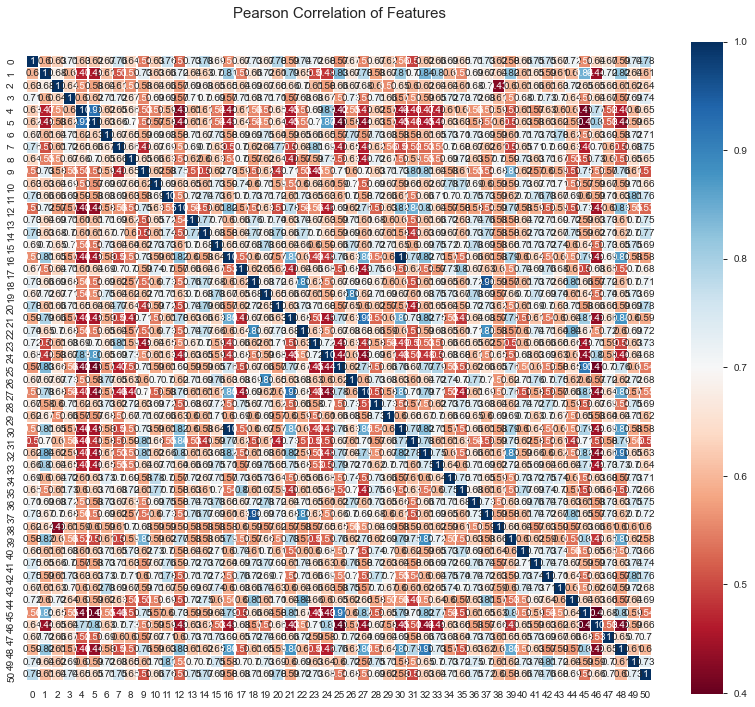

In [90]:
# 灰色关联结果矩阵可视化
import seaborn as sns
%matplotlib inline
def ShowGRAHeatMap(DataFrame):
    import matplotlib.pyplot as plt
    import seaborn as sns
    %matplotlib inline
    colormap = plt.cm.RdBu
    plt.figure(figsize=(14,12))
    plt.title('Pearson Correlation of Features', y=1.05, size=15)
    sns.heatmap(DataFrame.astype(float),linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)
    plt.show()
a = ShowGRAHeatMap(data_wine_gra)

In [93]:
top50_name

['x77',
 'x68',
 'x239',
 'x30',
 'x345',
 'x258',
 'x37',
 'x226',
 'x128',
 'x244',
 'x33',
 'x61',
 'x306',
 'x26',
 'x2',
 'x46',
 'x274',
 'x12',
 'x74',
 'x79',
 'x6',
 'x28',
 'x54',
 'x184',
 'x60',
 'x312',
 'x162',
 'x320',
 'x315',
 'x245',
 'x273',
 'x219',
 'x314',
 'x307',
 'x191',
 'x169',
 'x52',
 'x164',
 'x240',
 'x130',
 'x195',
 'x182',
 'x317',
 'x123',
 'x51',
 'x310',
 'x194',
 'x4',
 'x174',
 'x16',
 'y']